# PROJETO 2 - ANÁLISE EXPLORATÓRIA DE DADOS

#### Autoras: 
Izadora Bittencourt,
Carolina Coutinho,
Bruna Subtil e
Jessieli Avellar

### Variáveis:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) 
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- sex: woman or man (binary)     (0 = mulher, 1 = homem)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

### - Importação dos Dados 
Fonte: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). 
(https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

In [1]:
#Importando as bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv("heart_failure_clinical_records_dataset.csv", sep=',')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
dados.shape

(299, 13)

In [5]:
dados.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
dados.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
tabela_resumo = pd.pivot_table(dados, columns=['DEATH_EVENT'])
tabela_resumo

DEATH_EVENT,0,1
age,58.761906,65.215281
anaemia,0.408867,0.479167
creatinine_phosphokinase,540.054187,670.197917
diabetes,0.418719,0.416667
ejection_fraction,40.266010,33.468750
high_blood_pressure,0.325123,0.406250
platelets,266657.489901,256381.044792
serum_creatinine,1.184877,1.835833
serum_sodium,137.216749,135.375000
sex,0.650246,0.645833


### - Limpeza dos Dados

In [8]:
# Veficando se há dados nulos
dados.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
#Verificando se há linha duplicadas
duplicados = dados[dados.duplicated()]
duplicados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [10]:
#Verificando variáveis categoricas
print(dados["anaemia"].unique())
print(dados["diabetes"].unique())
print(dados["high_blood_pressure"].unique())
print(dados["sex"].unique())
print(dados["smoking"].unique())
print(dados["DEATH_EVENT"].unique())

[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]


### - Correlações

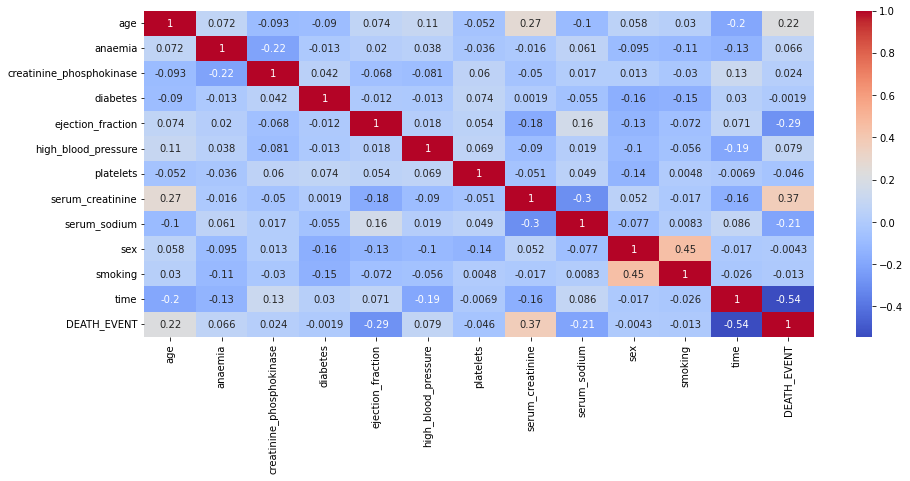

In [11]:
plt.figure(figsize=(15, 6))
sns.heatmap(dados.corr(method="spearman"), cmap='coolwarm', annot=True);
plt.show()

#### Nível de Correlação:

0.9 a 1 positivo ou negativo: Muito forte

0.7 a 0.9 positivo ou negativo: Forte

0.5 a 0.7 positivo ou negativo: Moderada

0.3 a 0.5 positivo ou negativo: Fraca

0 a 0.3 positivo ou negativo: Desprezível

Fonte: https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

#### - As colunas (exceto DEATH EVENT) que possuem níveis mais altos de correlação entre si são:

**serum_creatinine e serum_sodium**: -0,3 -> Correlação fraca

**sex e smoking**: 0,45 -> Correlação fraca

#### - As colunas que possume maior correlação com DEATH_EVENT:

**age**: 0.22 -> Correlação desprezível

**serum_sodium**: -0.21 -> Correlação desprezível

**ejection_fraction**: -0.29 -> Correlação desprezível

**serum_creatinine**: 0.37 -> Correlação fraca

**time**: -0.54 -> Correlação moderada

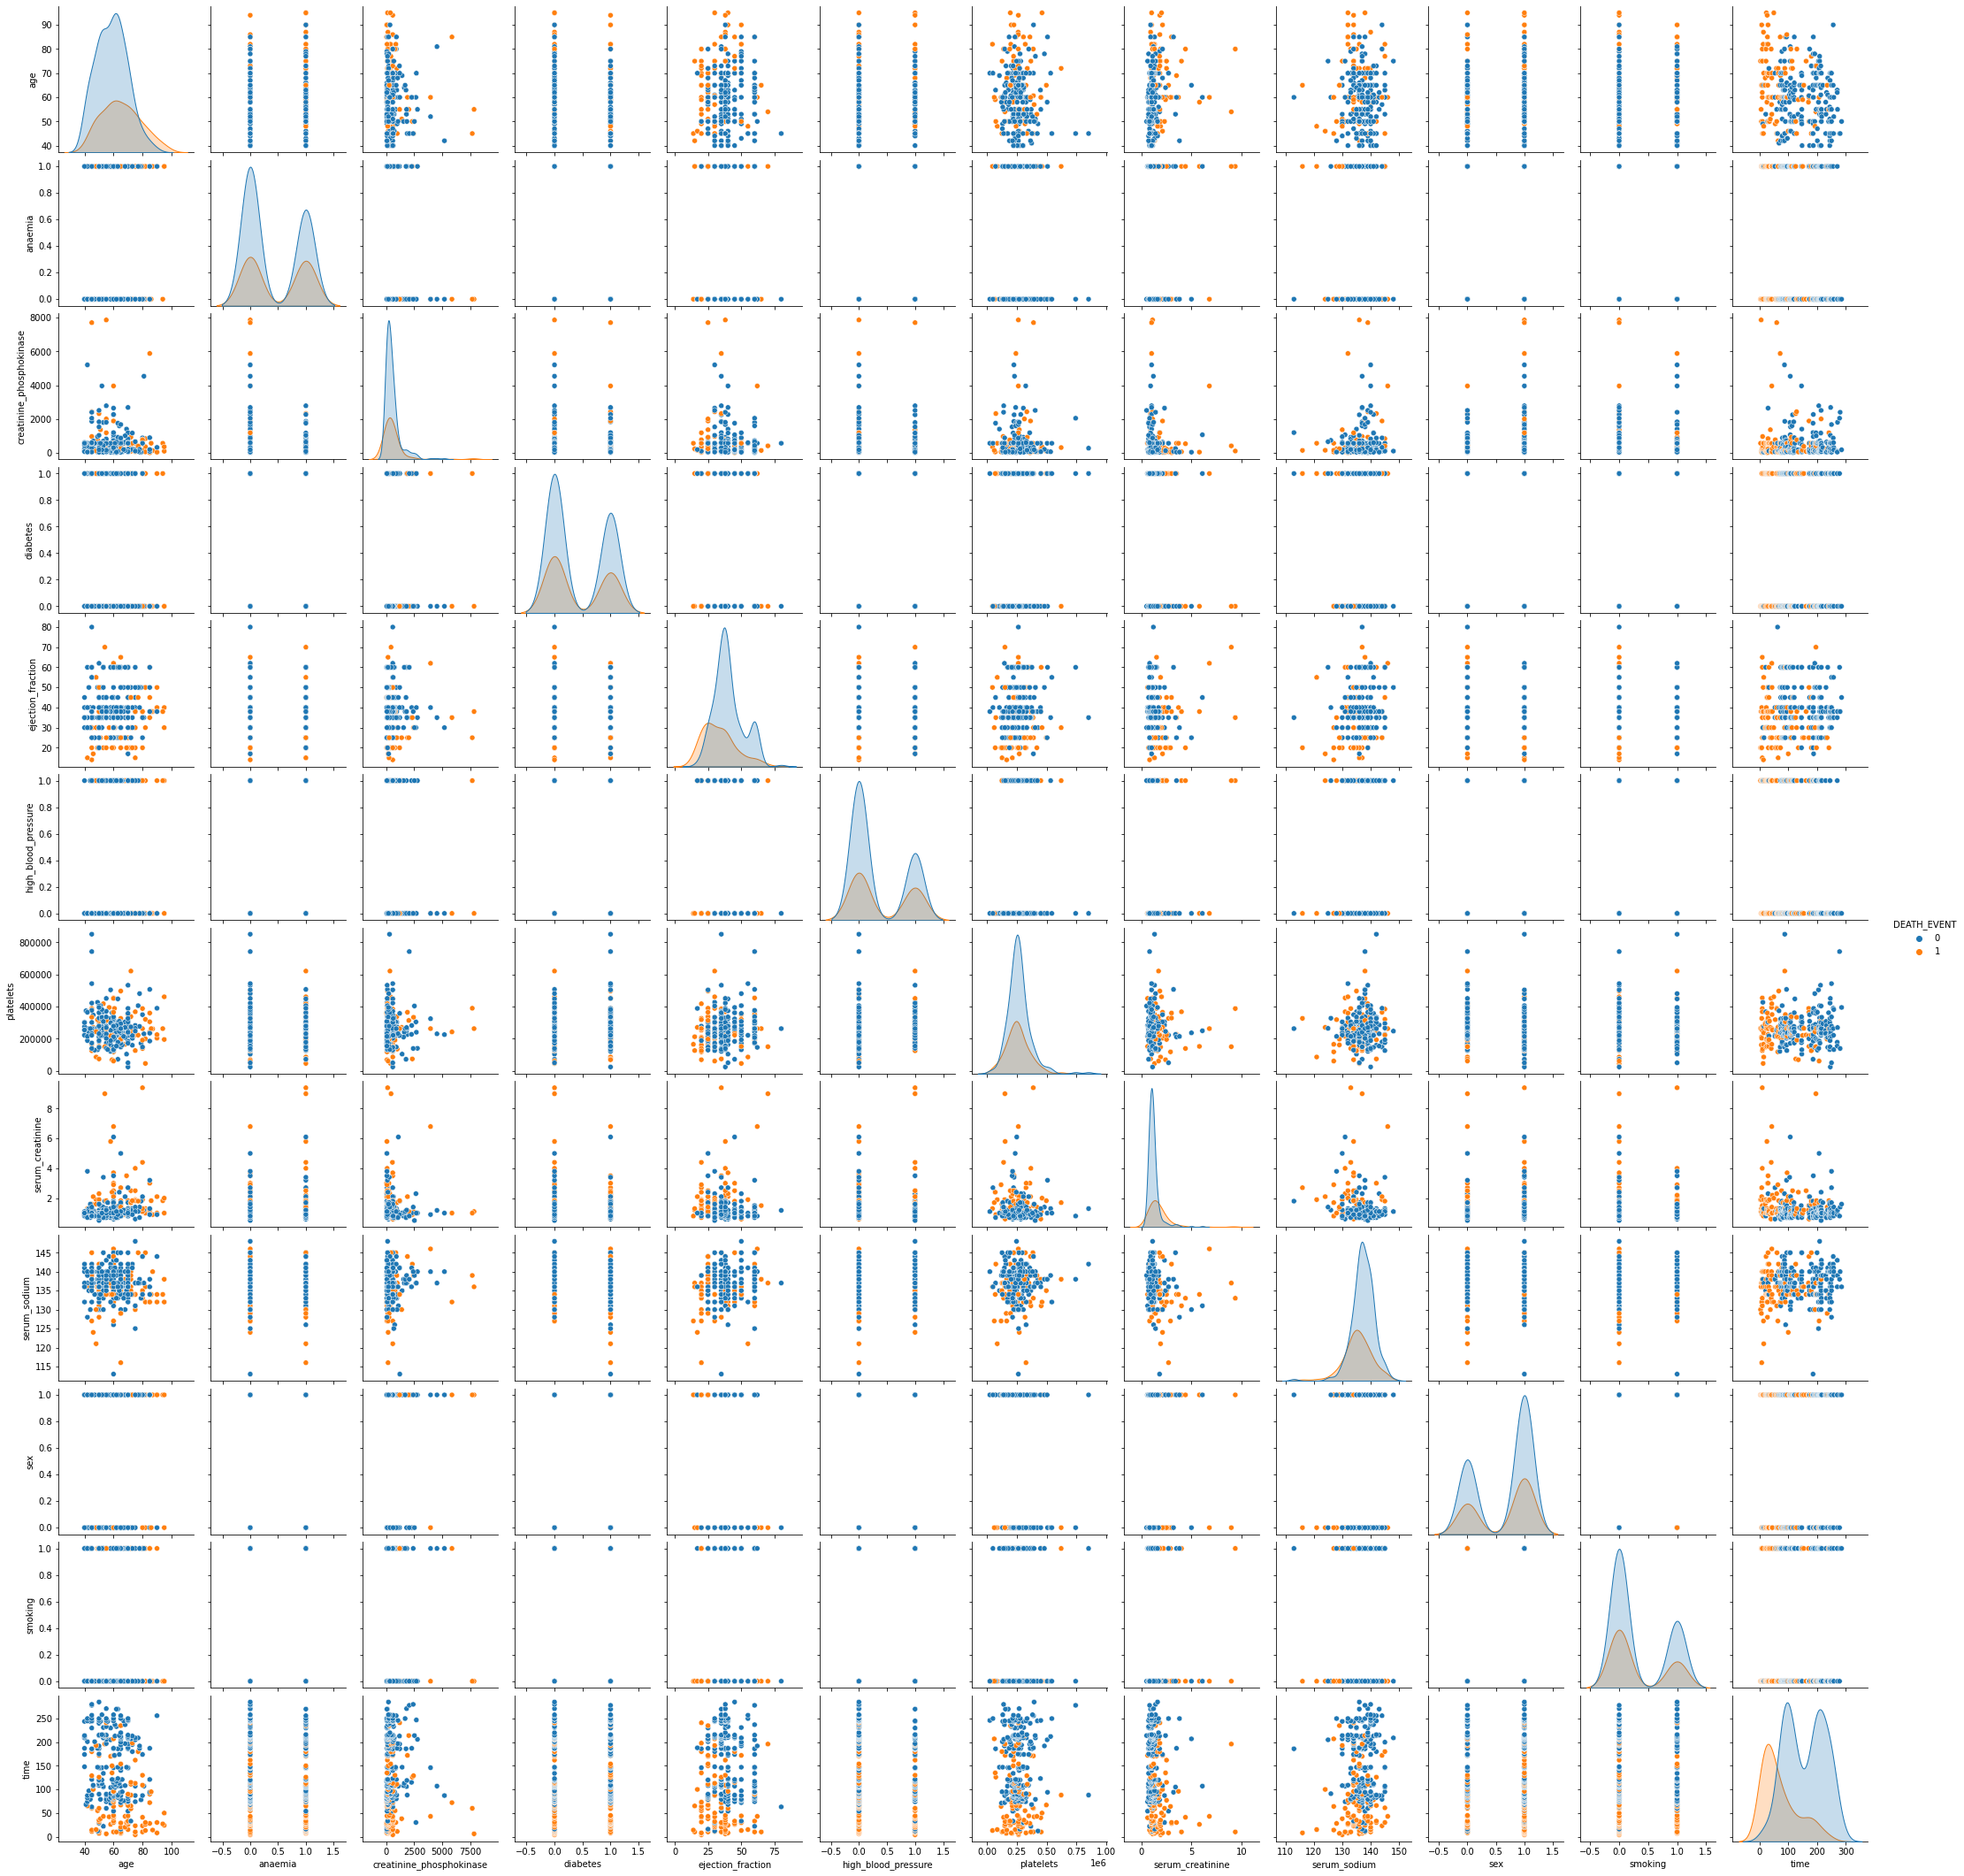

In [12]:
sns.pairplot(data = dados,hue='DEATH_EVENT');

## Colunas com maiores correlações com DEATH_EVENT

### 1. Ejection Fraction

Fração de Ejeção: Porcentagem de sangue que sai do coração a cada contração. Quanto maior, melhor.

In [13]:
dados.groupby("DEATH_EVENT")[["ejection_fraction"]].agg(["max","min"])

ejection_fraction    
                          max min
DEATH_EVENT                      
0                          80  17
1                          70  14

In [14]:
def rotulo(plot):
    for i in plot.patches:
        plot.annotate(round(i.get_height(), 2),
                      (i.get_x() + i.get_width() / 2, i.get_height()),
                      ha='center',
                      fontsize=12,
                      color='black',
                      xytext=(0, 3),
                      textcoords='offset points')

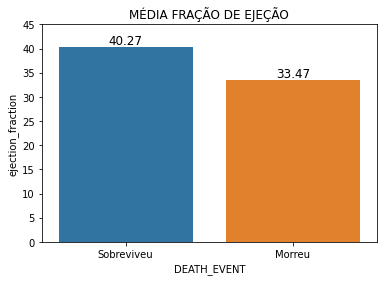

In [15]:
grafico = sns.barplot(x="DEATH_EVENT", y="ejection_fraction", data=dados, ci=False)
rotulo(grafico)
plt.title("MÉDIA FRAÇÃO DE EJEÇÃO")
plt.yticks([i for i in range (0, 50, 5)])
plt.xticks(ticks=[0, 1], labels=["Sobreviveu", "Morreu"]);

- Problemas cardíacos são mais recorrentes em pessoas com essa fração muito baixa. 
- A média dessa fração em quem morreu é ainda menor comparando com quem não morreu.

![image](https://user-images.githubusercontent.com/86680407/142738548-7d0238f9-9e5b-4385-b904-d578e5639aed.png)

In [16]:
dados["funçao_cardiaca"] = pd.cut(dados.ejection_fraction, [0,40,55,70,90], labels=["Possível Insuficiência Cardíaca", "Função Baixa", "Função Normal", "Função Alta"], right=False)

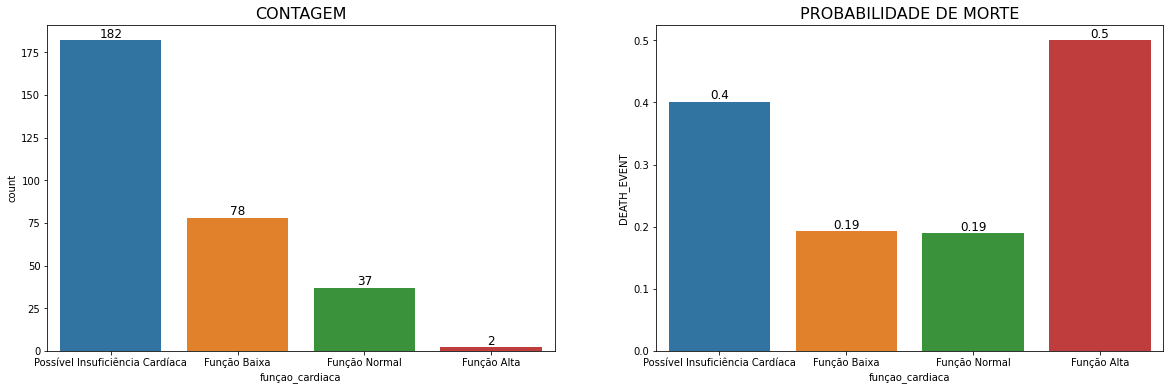

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].set_title('CONTAGEM', fontsize=16)
grafico1 = sns.countplot(x="funçao_cardiaca", data=dados, ax=axes[0])
rotulo(grafico1)

axes[1].set_title('PROBABILIDADE DE MORTE', fontsize=16)
grafico2 = sns.barplot(x="funçao_cardiaca", y="DEATH_EVENT", data=dados, ci=False, ax=axes[1])
rotulo(grafico2);

- Problemas cardíacos são mais recorrentes em pessoas com Possível Insuficiência Cardíaca, e depois na ordem.
- Quanto pior a função cardíaca, maior a probabilidade do evento da morte. 
- Exceto Função Alta, porém só existem duas pessoas com essa função do DataFrame.

### 2. Age

In [18]:
dados.groupby("DEATH_EVENT")[["age"]].agg(['max','min'])

age      
              max   min
DEATH_EVENT            
0            90.0  40.0
1            95.0  42.0

- Problemas cardíacos são mais recorrentes em pessoas com mais idade.

In [19]:
dados[dados["age"]<42]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,funçao_cardiaca
70,41.0,0,148,0,40,0,374000.0,0.8,140,1,1,68,0,Função Baixa
180,40.0,0,478,1,30,0,303000.0,0.9,136,1,0,148,0,Possível Insuficiência Cardíaca
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0,Função Baixa
206,40.0,1,101,0,40,0,226000.0,0.8,141,0,0,187,0,Função Baixa
232,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209,0,Possível Insuficiência Cardíaca
242,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212,0,Possível Insuficiência Cardíaca
248,40.0,0,624,0,35,0,301000.0,1.0,142,1,1,214,0,Possível Insuficiência Cardíaca
269,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0,Possível Insuficiência Cardíaca


- Mesmo todos tenho Possível Insuficiência Cardíaca, exceto 3 com Função Baixa, ninguém com menos de 42 anos morreu.

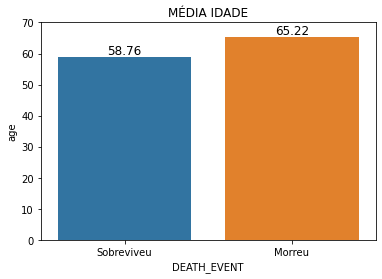

In [20]:
grafico = sns.barplot(x="DEATH_EVENT", y="age", data=dados, ci=False)
rotulo(grafico)
plt.title("MÉDIA IDADE")
plt.yticks([i for i in range (0, 80, 10)])
plt.xticks(ticks=[0, 1], labels=['Sobreviveu', 'Morreu']);

- A média de idade dos que morreram é ainda menor comparando com quem não morreu.

In [21]:
dados["cut_idade"] = pd.cut(dados.age, [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 96], right=False, labels=["40+", "45+", "50+", "55+", "60+", "65+", "70+", "75+", "80+", "85+", "90+"])

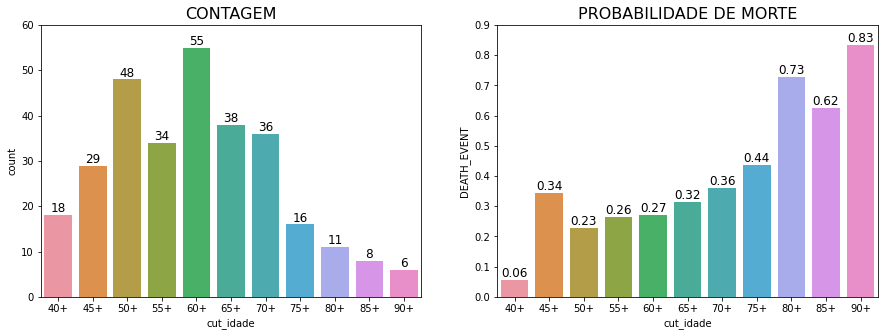

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title("CONTAGEM", fontsize=16)
grafico1 = sns.countplot(x="cut_idade", data=dados, ax=axes[0])
rotulo(grafico1)
axes[0].set_ylim([0, 60])

axes[1].set_title("PROBABILIDADE DE MORTE", fontsize=16)
grafico2 = sns.barplot(x="cut_idade", y="DEATH_EVENT", data=dados, ci=False, ax=axes[1])
rotulo(grafico2)
axes[1].set_ylim([0, 0.9]);

- Pessoas com problemas cardíacos se concentram mais na faixa entre 50 e 70 anos.
- No geral, quanto mais velho, maior a probabilidade do evento da morte.
- Faixa dos 45+ com probabilidade alta comparada com as faixas vizinhas.
- Faixa dos 85+ com probabilidade menor do que a dos 80+, mas ainda bem alta.

 #### Relação Idade e Função Cardíaca

In [23]:
tabela = pd.pivot_table(dados, index='cut_idade', columns=['funçao_cardiaca'], values=['DEATH_EVENT'], aggfunc=['mean', 'count'])
tabela

mean                             \
                                    DEATH_EVENT                              
funçao_cardiaca Possível Insuficiência Cardíaca Função Baixa Função Normal   
cut_idade                                                                    
40+                                    0.100000     0.000000      0.000000   
45+                                    0.428571     0.000000      0.200000   
50+                                    0.285714     0.142857      0.000000   
55+                                    0.375000     0.000000      0.000000   
60+                                    0.354839     0.076923      0.272727   
65+                                    0.400000     0.125000      0.200000   
70+                                    0.400000     0.363636      0.200000   
75+                                    0.857143     0.125000      0.000000   
80+                                    0.666667     1.000000           NaN   
85+                                    0.750000     0.500000      0.500000   
90+                                    0.666667     1.000000           NaN   

                                                      count               \
                                                DEATH_EVENT                
funçao_cardiaca Função Alta Possível Insuficiência Cardíaca Função Baixa   
cut_idade                                                                  
40+                     NaN                              10            7   
45+                     0.0                              21            2   
50+                     1.0                              28           14   
55+                     NaN                              24            8   
60+                     NaN                              31           13   
65+                     NaN                              25            8   
70+                     NaN                              20           11   
75+                     NaN                               7            8   
80+                     NaN                               9            2   
85+                     NaN                               4            2   
90+                     NaN                               3            3   

                                           
                                           
funçao_cardiaca Função Normal Função Alta  
cut_idade                                  
40+                         1           0  
45+                         5           1  
50+                         5           1  
55+                         2           0  
60+                        11           0  
65+                         5           0  
70+                         5           0  
75+                         1           0  
80+                         0           0  
85+                         2           0  
90+                         0           0

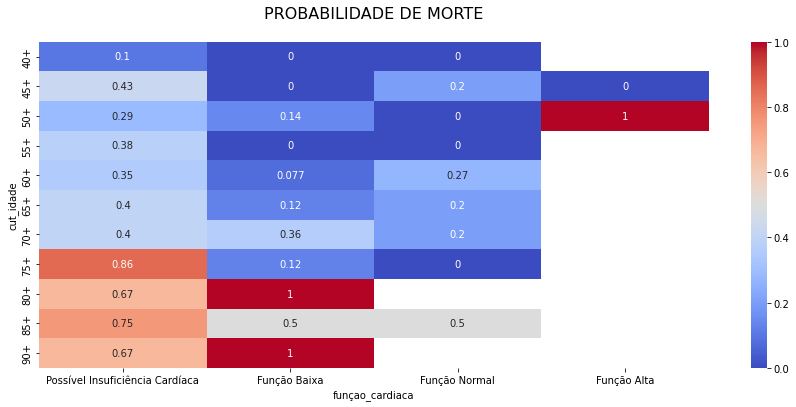

In [24]:
plt.figure(figsize=(15, 6))
plt.title("PROBABILIDADE DE MORTE\n", fontsize=16)
sns.heatmap(tabela.iloc[:, 0:4], annot=True, cmap='coolwarm')
plt.xlabel("funçao_cardiaca")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["Possível Insuficiência Cardíaca", "Função Baixa", "Função Normal", "Função Alta"])
plt.xticks(rotation=0);

- Canto inferior esquerdo com as maiores probabilidades.
- Grupo 75+ e Função Baixa com probabilidade baixíssima mesmo com 8 pessoas.
- Grupo 75+ e Possível Insuficiência Cardíaca com a probabilidade bem acima das faixas de maior idade. 
- Grupo 45+ e Possível Insuficiência Cardíaca com probabilidade bem acima das faixas vizinhas.
- Funçao Alta só em 45+ e 50+.
- Função Baixa até 75+ com probabilidades bem baixas.
- Função Normal com probabilidades bem baixas mesmo em idades altas. 
- Canto superior direito com baixíssimas probabilidades.

### 3. Serum Sodium

O teste de sódio sérico é um exame de sangue de rotina que indica se o paciente apresenta níveis normais de sódio no sangue. **Um nível anormalmente baixo de sódio no sangue pode ser causado por insuficiência cardíaca.**
Fonte: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Um **nível normal de sódio no sangue está entre 135 e 145** miliequivalentes por litro (mEq/L). O sódio desempenha um papel fundamental em seu corpo. Ajuda a manter a pressão arterial normal, apóia o trabalho de seus nervos e músculos e regula o equilíbrio de fluidos do corpo. 
Fonte: https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711

Nesse contexto foi considerado:
- Baixa: abaixo de 135 mEq/L
- Normal: Entre 135 e 145 mEq/L
- Alta: Acima de 145 mEq/L

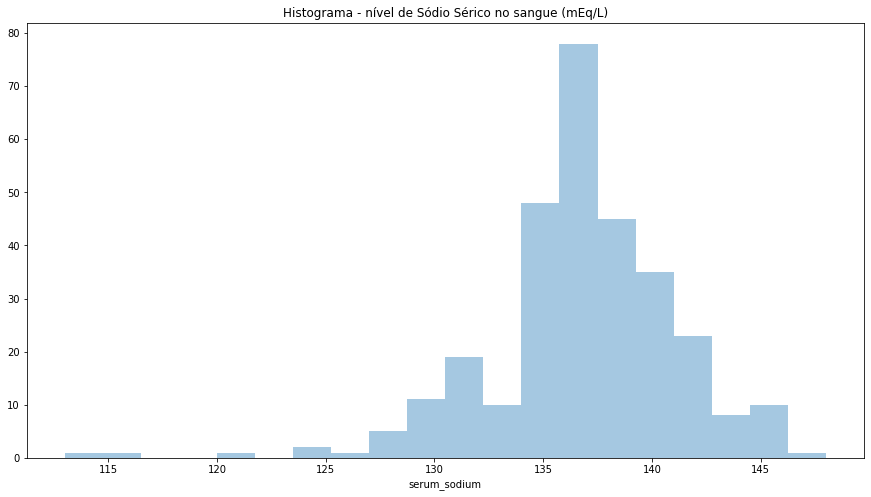

In [25]:
# Histograma do nível de Sódio Sérico entre os pacientes 

plt.figure(figsize=(15,8))
sns.distplot(dados['serum_sodium'], kde=False).set(title='Histograma - nível de Sódio Sérico no sangue (mEq/L)');

- CONCLUSÕES: A maioria das pessoas tinham um nível normal de sódio sérico

In [26]:
# Criando uma coluna com a classificação do Serum Sodium
dados["nivelSeSodium"] = pd.cut(dados.serum_sodium, [0,135,145,148], labels=["Abaixo", "Normal", "Acima"], right=False)

# Tabela com o número de pacientes e porcentagem de mortes por nível de Sódio Sérico
dados.groupby(["nivelSeSodium"])[["DEATH_EVENT"]].agg(['count', 'mean'])

DEATH_EVENT          
                    count      mean
nivelSeSodium                      
Abaixo                 83  0.506024
Normal                205  0.243902
Acima                  10  0.400000

- CONCLUSÕES: A maioria das pessoas tinham um nível normal de sódio sérico.
    No entanto, entre os pacientes com nível baixo a probabilidade de morte foi a maior entre os grupos

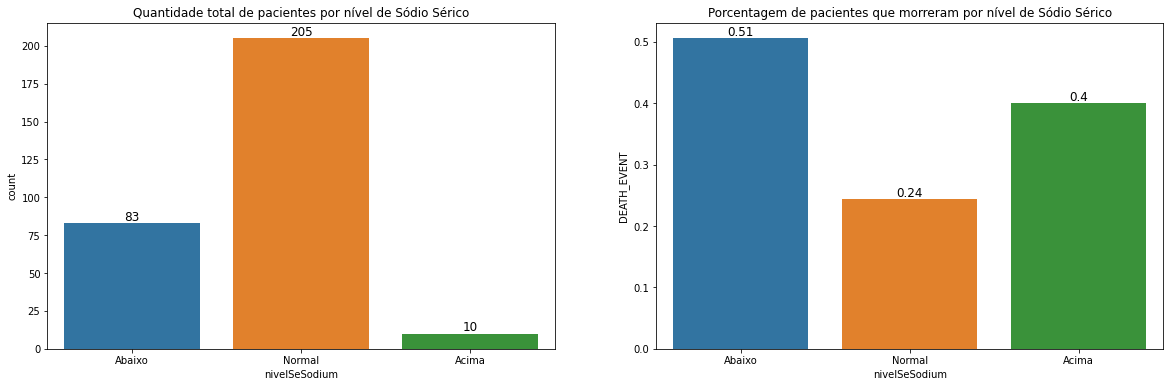

In [27]:
# Quantidade de pacientes por nível de Sódio Sérico (esquerda)
# Porcentagem de pacientes que morreram por nível de Sódio Sérico (direita)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

grafico1 = sns.countplot(x="nivelSeSodium", data=dados, ax=axes[0])
axes[0].set_title('Quantidade total de pacientes por nível de Sódio Sérico')
rotulo(grafico1)

grafico2 = sns.barplot(x="nivelSeSodium", y="DEATH_EVENT", data=dados, ci=False, ax=axes[1])
axes[1].set_title('Porcentagem de pacientes que morreram por nível de Sódio Sérico')
rotulo(grafico2)

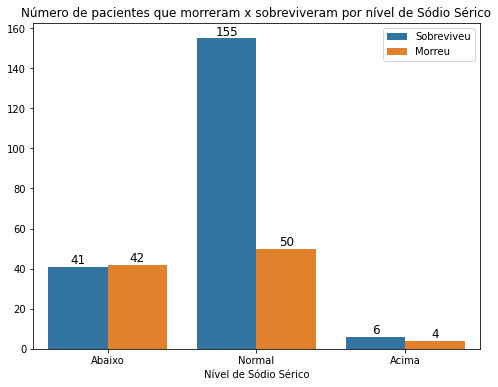

In [28]:
# GRÁFICO Número de pacientes que morreram x sobreviveram por nível de soro sérico
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Número de pacientes que morreram x sobreviveram por nível de Sódio Sérico')
grafico = sns.countplot(x="nivelSeSodium", data = dados, hue='DEATH_EVENT')
ax.set_xlabel('Nível de Sódio Sérico')
ax.set_ylabel('')
rotulo(grafico)
plt.legend(labels=['Sobreviveu', 'Morreu']);

### 4. Serum Creatinine

Um teste de creatinina é uma medida de quão bem seus rins estão realizando sua função de filtrar os resíduos de seu sangue.

O intervalo típico para creatinina sérica é: **Para homens adultos, 0,74 a 1,35 mg / dL (65,4 a 119,3 micromoles / L) e para mulheres adultas, 0,59 a 1,04 mg / dL (52,2 a 91,9 micromoles / L)**

Fonte:https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646

Outra fonte: 

Homens: 0,6 a 1,2 mg/dL

Mulheres: 0,5 a 1,0 mg/dL

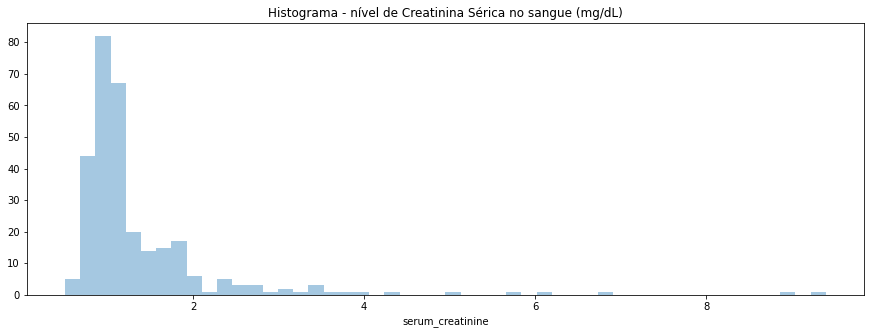

In [29]:
# Histograma geral do nível de creatinina sérica

plt.figure(figsize=(15,5))
sns.distplot(dados['serum_creatinine'], kde=False).set(title='Histograma - nível de Creatinina Sérica no sangue (mg/dL)');

In [30]:
# Níveis de creatinina sérica em relação ao óbito
dados.groupby(["DEATH_EVENT",'sex'])[["serum_creatinine"]].agg(['count','mean'])

serum_creatinine          
                           count      mean
DEATH_EVENT sex                           
0           0                 71  1.115070
            1                132  1.222424
1           0                 34  1.945882
            1                 62  1.775484

- CONCLUSÃO: 

Entre os óbitos a média de creatinina sérica foi consideravelmente mais alta do que entre os sobreviventes
Também entre os sobreviventes, a média se manteve dentro do considerado normal para ambos os sexos.
Nos óbitos, a média para mulheres (sex = 0) foi de 1,92 mg/dL, bem maior que o considerado normal (0,5 a 1,0 mg/dL)
Para os homens (sex = 1) foi de 1.77 mg/dL, também significativamente maior que o normal (0,6 a 1,2 mg/dL)

In [31]:
# Criando uma coluna com a classificação do Creatinina Sérica
# Mulheres
mulheres = dados[dados['sex']==0] # NORMAL Mulheres: 0,5 a 1,0 mg/dL
mulheres['cut_serum_creatinine'] = pd.cut(mulheres.serum_creatinine, [0,1.0,9.5], labels=["Normal", "Acima"], right=False)
# Homens
homens = dados[dados['sex']==1] # NORMAL Homens: 0,6 a 1,2 mg/dL
homens['cut_serum_creatinine'] = pd.cut(homens.serum_creatinine, [0,1.0,9.5], labels=["Normal", "Acima"], right=False)

In [32]:
# TABELA MULHERES
mulheres.groupby(['cut_serum_creatinine',"DEATH_EVENT"])[["serum_creatinine"]].agg(['count', 'mean', 'min', 'max'])

serum_creatinine                    
                                            count      mean  min  max
cut_serum_creatinine DEATH_EVENT                                     
Normal               0                         31  0.814516  0.5  0.9
                     1                          2  0.750000  0.6  0.9
Acima                0                         40  1.348000  1.0  5.0
                     1                         32  2.020625  1.0  9.0

- Como é possível observar, entre as pacientes com a creatinina sérica elevada ocorreram mais mortes 

In [33]:
# TABELA HOMENS
homens.groupby(['cut_serum_creatinine',"DEATH_EVENT"])[["serum_creatinine"]].agg(['count', 'mean', 'min', 'max'])

serum_creatinine                    
                                            count      mean  min  max
cut_serum_creatinine DEATH_EVENT                                     
Normal               0                         41  0.792683  0.6  0.9
                     1                          7  0.814286  0.6  0.9
Acima                0                         91  1.416044  1.0  6.1
                     1                         55  1.897818  1.0  9.4

- Como é possível observar, entre os pacientes com a creatinina sérica elevada ocorreram mais mortes

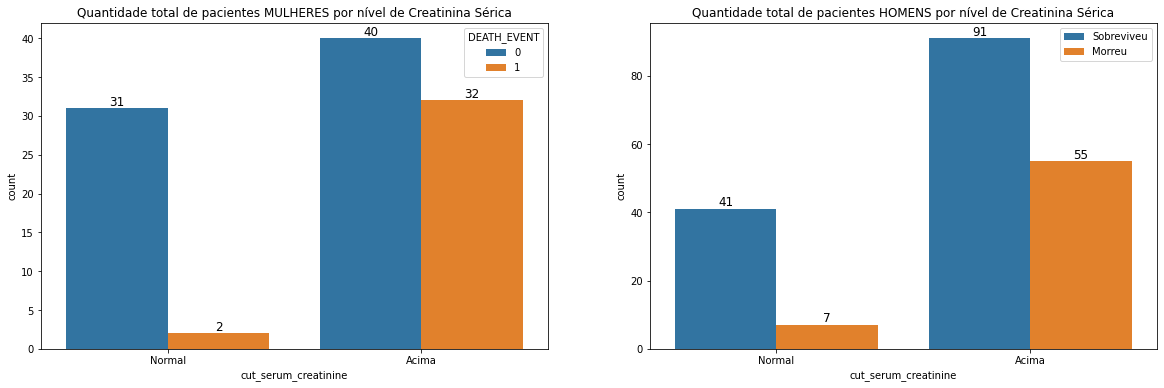

In [34]:
# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
grafico1 = sns.countplot(x='cut_serum_creatinine', data=mulheres, ax=axes[0], hue='DEATH_EVENT')
rotulo(grafico1)
axes[0].set_title('Quantidade total de pacientes MULHERES por nível de Creatinina Sérica')
plt.legend(labels=['Sobreviveu', 'Morreu']);

grafico2 = sns.countplot(x='cut_serum_creatinine', data=homens, ax=axes[1], hue='DEATH_EVENT')
rotulo(grafico2)
axes[1].set_title('Quantidade total de pacientes HOMENS por nível de Creatinina Sérica')
plt.legend(labels=['Sobreviveu', 'Morreu']);

- CONCLUSÃO: Dentro os pacientes com a creatinina sérica elevanda, o índice perentual de óbitos foi maior em ambos os sexos

### Serum Creatinine e Serum Sodium

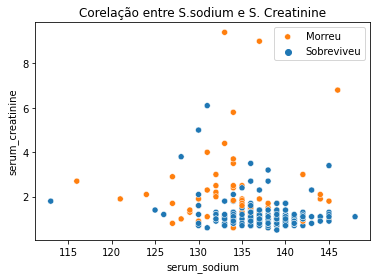

In [35]:
sns.scatterplot(x='serum_sodium', y='serum_creatinine', data=dados, hue='DEATH_EVENT').set(title='Corelação entre S.sodium e S. Creatinine');
plt.legend(labels=['Morreu', 'Sobreviveu']);

### 5. Follow-up Time

In [36]:
dados["mes"] = pd.cut(dados.time, [0,30,60,90,120,150,180,210,240,270,290], labels=["1","2","3","4","5","6","7","8","9","10"], right=False)

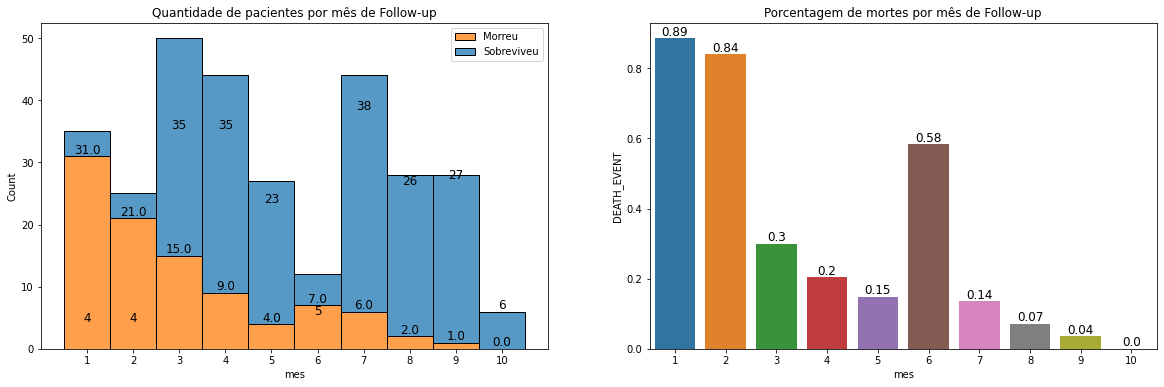

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graf1 = sns.histplot(data=dados, x="mes", hue="DEATH_EVENT", multiple="stack", bins=9,ax=axes[0])
rotulo(graf1)
axes[0].set_title('Quantidade de pacientes por mês de Follow-up');
axes[0].legend(labels=['Morreu', 'Sobreviveu']);
graf2 =sns.barplot(x="mes", y="DEATH_EVENT", data=dados, ci=False, ax=axes[1])
axes[1].set_title('Porcentagem de mortes por mês de Follow-up');
rotulo(graf2)

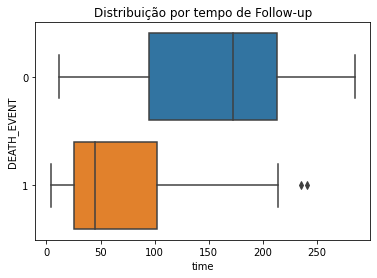

In [38]:
sns.boxplot(x="time", y="DEATH_EVENT",orient="h", data=dados).set(title='Distribuição por tempo de Follow-up');

## Colunas de correlação baixíssima com DEATH_EVENT

- Categóricas: anaemia, diabetes, high_blood_pressure, sex, smoking
- Numéricas: platelets, creatinine_phosphokinase

### 1) Creatinine phosphokinase

**Uma CPK aumentada, ou que se eleva a partir do primeiro exame, em geral indica que houve lesão do coração ou de outros músculos. Pode também indicar uso intenso de músculos.**

A FDA dos Estados Unidos especifica um nível de CPK superior a 50 vezes o limite superior do normal
O Painel de Especialistas em Segurança Muscular da National Lipid Association  subdivide ainda mais as elevações da CPK, em relação ao limite superior, em categorias leve (<10 vezes), moderada (10-49 vezes) e alta (≥50 vezes).

referência (níveis normais): 10 a 120 mcg/L

alteração na CPK:

- leve: 121 a 1200 mcg/L
- moderada: 1201 a 5880 mcg/L
- alta: maior que 6000 mcg/L

Fontes: https://prcardio.org/profissionais-saude/creatinofosfoquinase-cpk/

http://consultoriorodrigomartinez.com.br/blog/post/cpk-a-enzima-do-exerccio

#### Análise dos níveis de alteração de CPK no sangue

In [39]:
#Criando a coluna nivelCPK que mostra as categorias de nível de CPK no sangue de acordo com o trecho acima 

dados["nivelCPK"] = pd.cut(dados.creatinine_phosphokinase, [0,120,1200,5880,10000], labels=["Nível Normal", "Alteração Leve", "Alteração Moderada", "Alteração Alta"], right=False)
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,funçao_cardiaca,cut_idade,nivelSeSodium,mes,nivelCPK
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Possível Insuficiência Cardíaca,75+,Abaixo,1,Alteração Leve
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Possível Insuficiência Cardíaca,55+,Normal,1,Alteração Alta
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Possível Insuficiência Cardíaca,65+,Abaixo,1,Alteração Leve
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Possível Insuficiência Cardíaca,50+,Normal,1,Nível Normal
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Possível Insuficiência Cardíaca,65+,Abaixo,1,Alteração Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,Possível Insuficiência Cardíaca,60+,Normal,10,Nível Normal
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,Possível Insuficiência Cardíaca,55+,Normal,10,Alteração Moderada
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,Função Normal,45+,Normal,10,Alteração Moderada
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,Possível Insuficiência Cardíaca,45+,Normal,10,Alteração Moderada


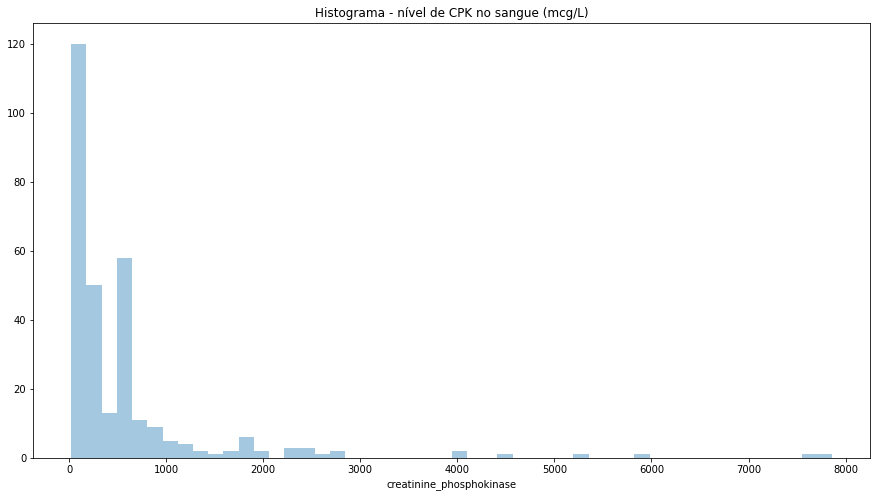

In [40]:
#HISTOGRAMA DO NÍVEL DE CPK NO SANGUE

plt.figure(figsize=(15,8))
sns.distplot(dados['creatinine_phosphokinase'], kde=False);
plt.title('Histograma - nível de CPK no sangue (mcg/L)');

- A grande maioria dos pacientes apresentam nível de CPK entre o nível normal e a alteração leve

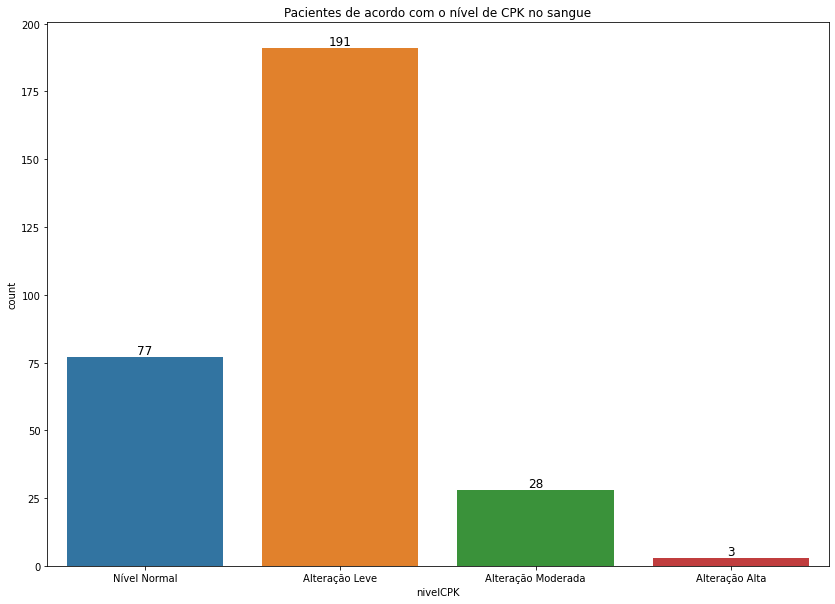

In [41]:
#GRÁFICO DE QUANTIDADE DE PACIENTES DE ACORDO COM O NÍVEL DE CPK NO SANGUE 

plt.figure(figsize=(14,10))
grafico = sns.countplot(x='nivelCPK', data=dados);
rotulo(grafico)
plt.title("Pacientes de acordo com o nível de CPK no sangue");

- A grande maioria dos pacientes apresentam nível de CPK entre o nível normal e a alteração leve

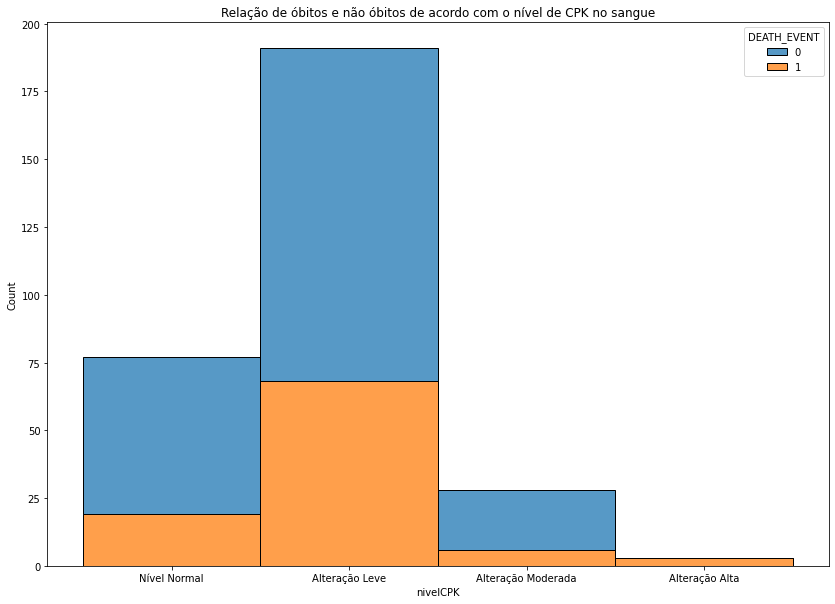

In [42]:
#ANALISANDO OS ÓBITOS EM RELAÇÃO AO NIVEL DE CPK NO SANGUE
plt.figure(figsize=(14,10))
sns.histplot(x='nivelCPK', data=dados, hue='DEATH_EVENT', multiple="stack");
plt.title("Relação de óbitos e não óbitos de acordo com o nível de CPK no sangue");

- Das pessoas com alteração alta, 100% morreram
- Das pessoas com alteração leve, mais da metade morreram
- Alteração moderada e nível normal de CPK são as menores relações de morte.

- Das pessoas que morreram, a maioria tinha alteração leve de CPK no sangue

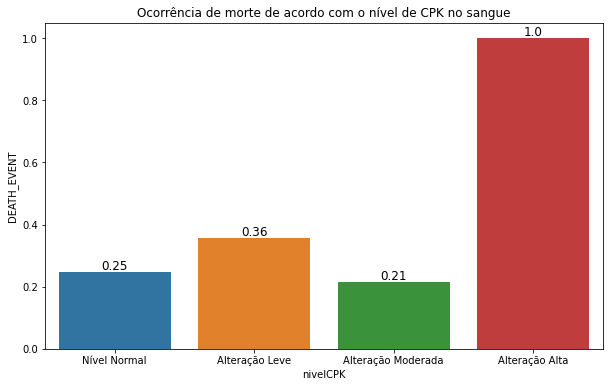

In [44]:
#GRÁFICO DAS OCORRÊNCIAS DE MORTE EM % COM RELAÇÃO AO NÍVEL DE CPK EM CATEGORIAS

plt.figure(figsize=(10,6))
grafico = sns.barplot(y='DEATH_EVENT', x='nivelCPK', data = dados, ci=False);
rotulo(grafico)
plt.title("Ocorrência de morte de acordo com o nível de CPK no sangue");

- Dos pacientes que tiveram alteração alta, todos morreram
- Apesar de ser raro ter alteração alta (apenas 3 de 299 pacientes), apresentar CPK em nível alto é um fator de alto risco
- O que chama atenção é que a alteração moderada é a que possui menor ocorrência de morte (cerca de 20%)

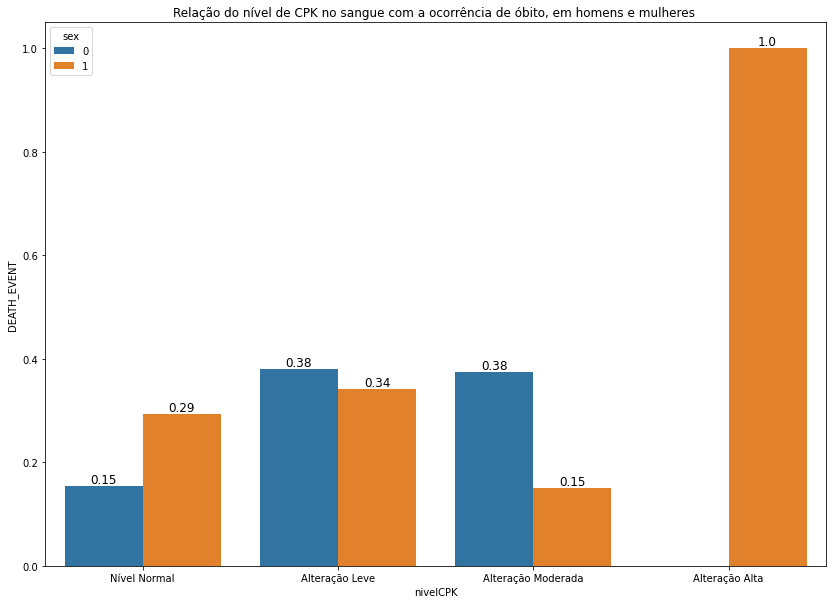

In [45]:
#ANÁLISE DA RELAÇÃO ENTRE NIVEL DE CPK, SEXO E OCORRENCIA DE MORTE

graficoSexCPK = pd.DataFrame(dados.groupby(["nivelCPK", "sex"])[['DEATH_EVENT']].mean())
graficoSexCPK.reset_index(inplace=True)
plt.figure(figsize=(14,10))
grafico = sns.barplot(y="DEATH_EVENT", x="nivelCPK", data=graficoSexCPK, hue="sex");
rotulo(grafico)
plt.title("Relação do nível de CPK no sangue com a ocorrência de óbito, em homens e mulheres ");

- Mulheres não apresentaram nível alto de CPK no sangue
- Mulheres tiveram maior ocorrência de óbito nas classes de alteração leve e moderada, em relação aos homens
- Porém em níveis normais de CPK, homens apresentaram maior ocorrência de óbito
- Por isso não podemos analisar o nível de CPK de maneira isolada

#### Análise da relação do nível de CPK no sangue com outros fatores associados

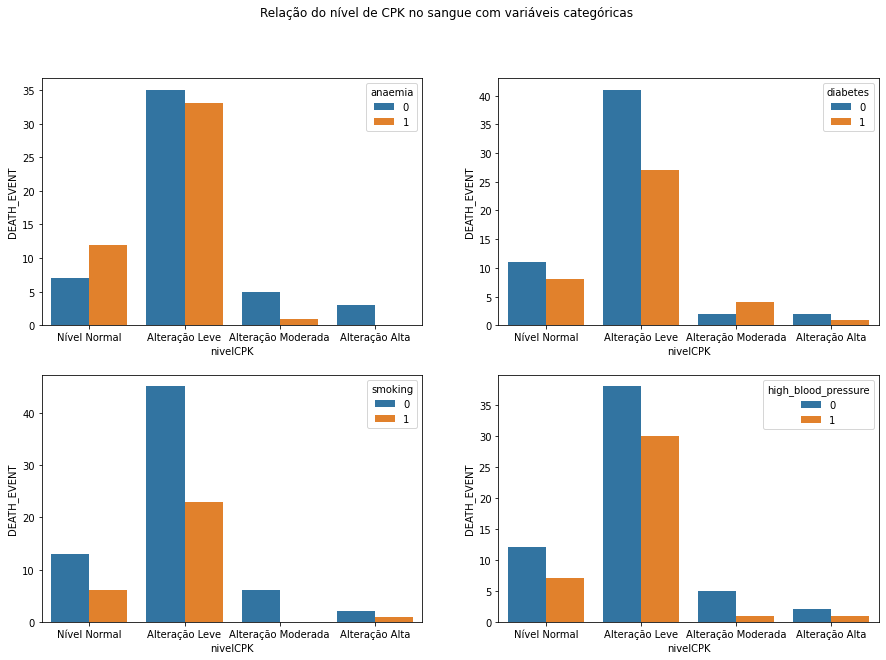

In [46]:
graficoAnemiaCPK = pd.DataFrame(dados.groupby(["nivelCPK", "anaemia"])[['DEATH_EVENT']].sum())
graficoAnemiaCPK.reset_index(inplace=True)

graficoDiabetesCPK = pd.DataFrame(dados.groupby(["nivelCPK", "diabetes"])[['DEATH_EVENT']].sum())
graficoDiabetesCPK.reset_index(inplace=True)

graficoFumanteCPK = pd.DataFrame(dados.groupby(["nivelCPK", "smoking"])[['DEATH_EVENT']].sum())
graficoFumanteCPK.reset_index(inplace=True)

graficoPressaoCPK = pd.DataFrame(dados.groupby(["nivelCPK", "high_blood_pressure"])[['DEATH_EVENT']].sum())
graficoPressaoCPK.reset_index(inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Relação do nível de CPK no sangue com variáveis categóricas')
sns.barplot(y="DEATH_EVENT", x= "nivelCPK", data=graficoAnemiaCPK, hue='anaemia', ax = axes[0,0]);
sns.barplot(y="DEATH_EVENT", x="nivelCPK", data=graficoDiabetesCPK, hue="diabetes", ax = axes[0,1]);
sns.barplot(y="DEATH_EVENT", x="nivelCPK", data=graficoFumanteCPK, hue="smoking", ax = axes[1,0]);
sns.barplot(y="DEATH_EVENT", x="nivelCPK", data=graficoPressaoCPK, hue="high_blood_pressure", ax = axes[1,1]);

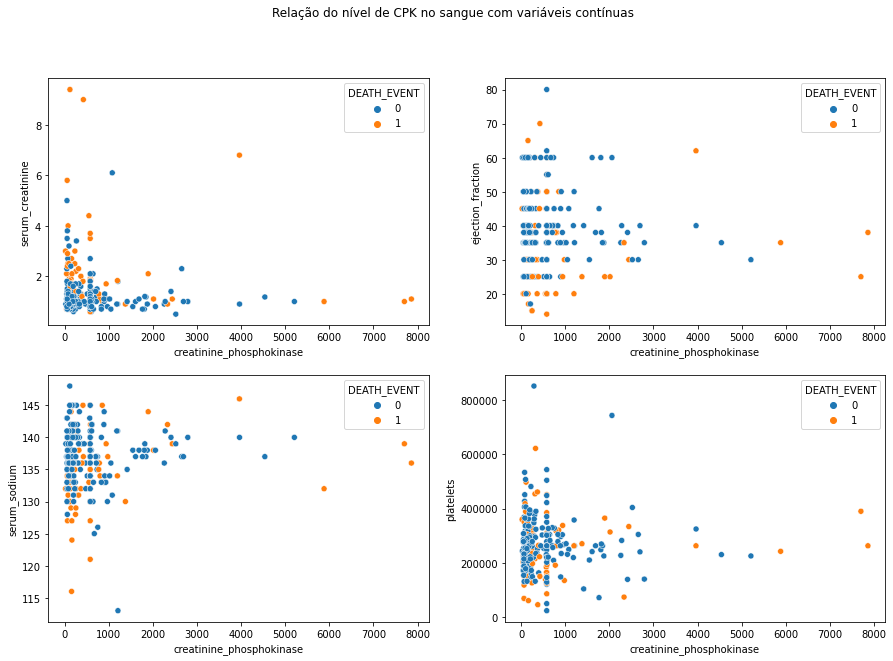

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Relação do nível de CPK no sangue com variáveis contínuas')
sns.scatterplot(x='creatinine_phosphokinase', y='serum_creatinine', data=dados, hue='DEATH_EVENT', ax = axes[0,0]);
sns.scatterplot(x='creatinine_phosphokinase', y='ejection_fraction', data=dados, hue='DEATH_EVENT', ax = axes[0,1]);
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=dados, hue='DEATH_EVENT', ax = axes[1,0]);
sns.scatterplot(x='creatinine_phosphokinase', y='platelets', data=dados, hue='DEATH_EVENT', ax = axes[1,1]);

- Pacientes com creatinina sérica acima do nível normal (1,1mg/dL em média) e com alteração leve no nível de CPK(121 a 1200mcg/L) apresentaram maior ocorrência de morte
- Pacientes com ejeção sanguínea abaixo do nível normal (abaixo de 50, mas mais precisamente abaixo de 30%), e alteração leve ou moderada de CPK no sangue tiveram maior ocorrência de óbito
- Pacientes que apresentaram Hiponatremia (sódio sérico abaixo de 135 mEq/L) e alteração leve de CPK no sangue tiveram maior ocorrência de óbito
- Não há relação considerável entre a quantidade de plaquetas (qtd normal de 140.000 a 450.000) e o nível de CPK no sangue com a ocorrência de óbitos


### 2) Platelets

Uma contagem normal de plaquetas varia de **150.000 a 450.000 plaquetas por microlitro de sangue**.

Se você tiver muitas plaquetas, pode aumentar o risco de coagulação. Mas muitas vezes o risco cardiovascular tem mais a ver com a função plaquetária do que com o número de plaquetas. Por exemplo, você pode ter um número saudável de plaquetas, mas se elas estiverem grudadas demais, isso pode aumentar sua chance de ter um ataque cardíaco ou derrame.

Fonte:https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important

In [48]:
dados.groupby("DEATH_EVENT")[["platelets"]].agg(["max","min","mean"])

platelets                        
                  max      min           mean
DEATH_EVENT                                  
0            850000.0  25100.0  266657.489901
1            621000.0  47000.0  256381.044792

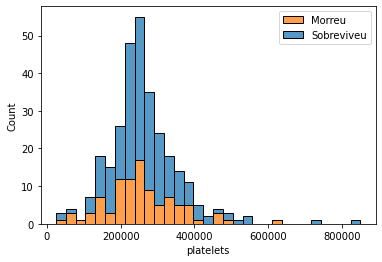

In [49]:
sns.histplot(data=dados, x="platelets", hue="DEATH_EVENT", multiple="stack");
plt.legend(labels=['Morreu', 'Sobreviveu']);

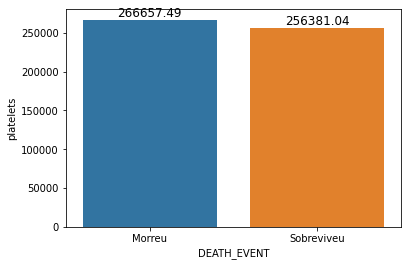

In [50]:
graf3= sns.barplot(data=dados, x="DEATH_EVENT", y="platelets", ci=False)
plt.xticks(ticks=[0, 1], labels=['Morreu', 'Sobreviveu']);
rotulo(graf3)

### 3) Anaemia

In [51]:
dados.groupby("DEATH_EVENT")[["anaemia"]].agg(['count','sum', 'mean'])

anaemia              
              count sum      mean
DEATH_EVENT                      
0               203  83  0.408867
1                96  46  0.479167

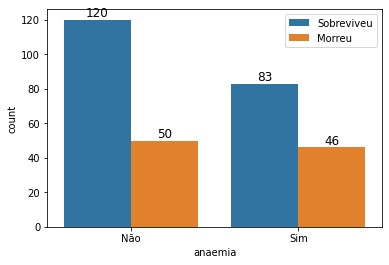

In [52]:
graf4 = sns.countplot(data=dados, x='anaemia', hue='DEATH_EVENT');
plt.legend(labels=['Sobreviveu', 'Morreu']);
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim']);
rotulo(graf4)

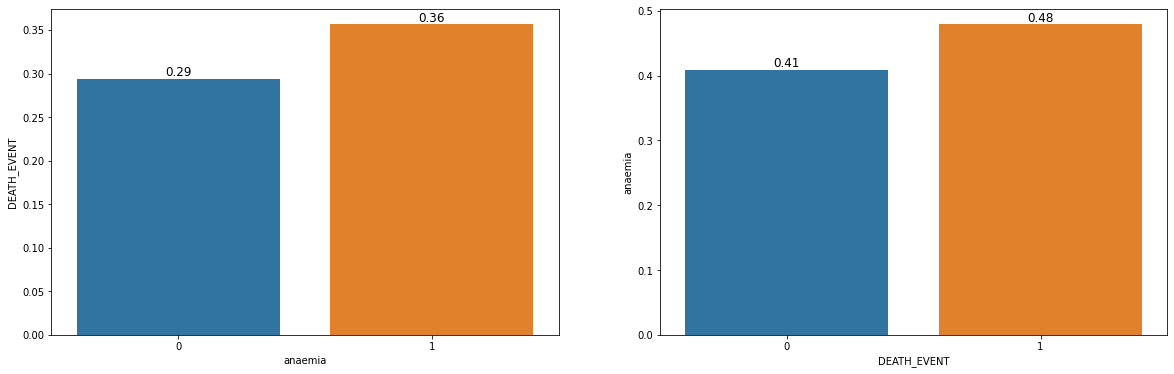

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graf5=sns.barplot(x="anaemia", y="DEATH_EVENT", data=dados, ci=False, ax=axes[0]);
rotulo(graf5)
graf6=sns.barplot(x="DEATH_EVENT", y="anaemia", data=dados, ci=False, ax=axes[1]);
rotulo(graf6)

- Pacientes anêmicos parecem ter uma maior porcentagem de óbitos.

### 4) Diabetes 

In [54]:
dados.groupby("DEATH_EVENT")[["diabetes"]].agg(['count','sum', 'mean'])

diabetes              
               count sum      mean
DEATH_EVENT                       
0                203  85  0.418719
1                 96  40  0.416667

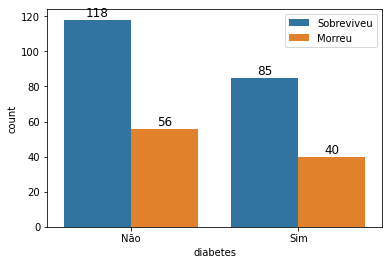

In [55]:
graf7 = sns.countplot(data=dados, x='diabetes', hue='DEATH_EVENT');
rotulo(graf7)
plt.legend(labels=['Sobreviveu', 'Morreu']);
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim']);

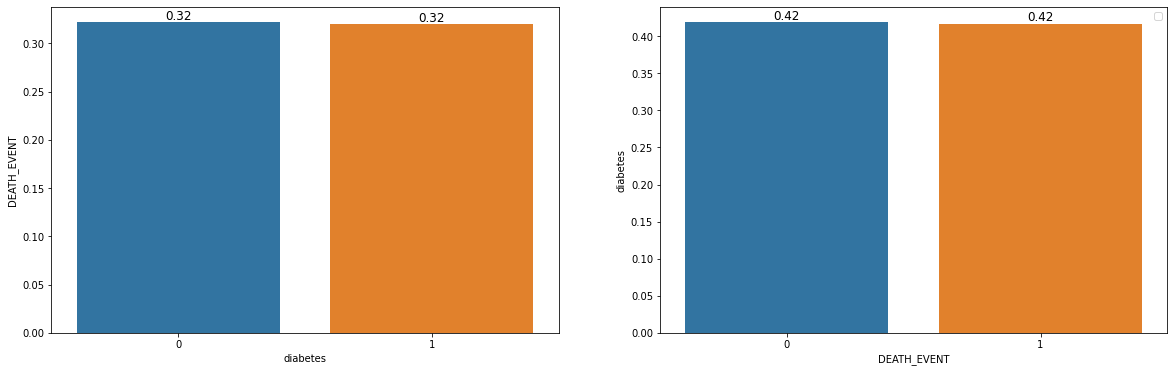

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graf8 = sns.barplot(x="diabetes", y="DEATH_EVENT", data=dados, ci=False, ax=axes[0]);
plt.legend(labels=['Morreu', 'Sobreviveu']);
rotulo(graf8)
graf9 = sns.barplot(x="DEATH_EVENT", y="diabetes", data=dados, ci=False, ax=axes[1]);
rotulo(graf9)

- Aparentemente a diabetes não afeta significantemente as chances de de óbito em pacientes que tiveram falhas cardíacas.

### 5) High blood pressure 

In [57]:
dados.groupby("DEATH_EVENT")[["high_blood_pressure"]].agg(['count','sum', 'mean'])

high_blood_pressure              
                          count sum      mean
DEATH_EVENT                                  
0                           203  66  0.325123
1                            96  39  0.406250

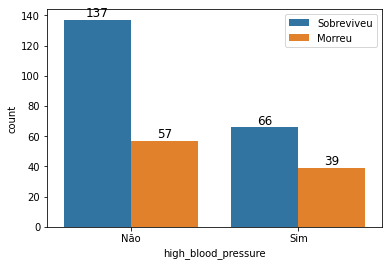

In [58]:
graf10 = sns.countplot(data=dados, x='high_blood_pressure', hue='DEATH_EVENT');
plt.legend(labels=['Sobreviveu', 'Morreu']);
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim']);
rotulo(graf10)

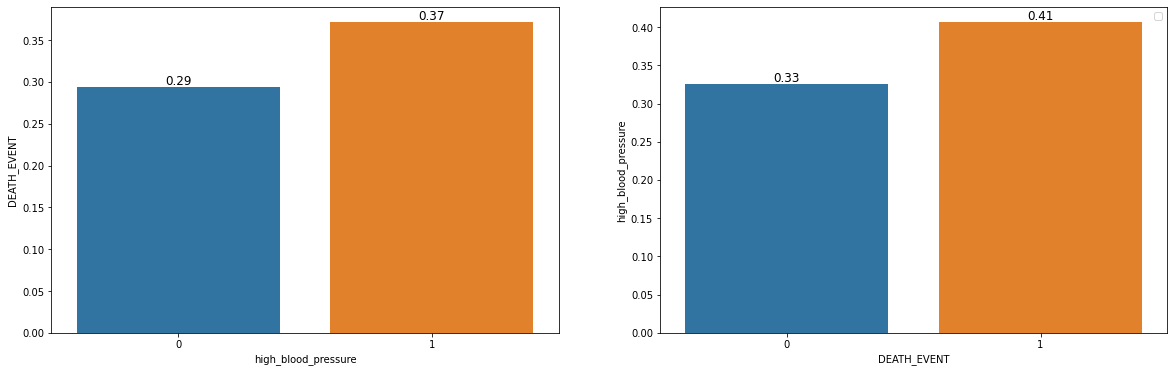

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graf11=sns.barplot(x="high_blood_pressure", y="DEATH_EVENT", data=dados, ci=False, ax=axes[0]);
plt.legend(labels=['Morreu', 'Sobreviveu']);
rotulo(graf11)
graf12=sns.barplot(x="DEATH_EVENT", y="high_blood_pressure", data=dados, ci=False, ax=axes[1]);
rotulo(graf12)

- As pessoas com pressão alta apresentam um porcentagem maior de mortes.

### 6) Sex

In [60]:
dados.groupby("DEATH_EVENT")[["sex"]].agg(['count','sum', 'mean'])

sex               
            count  sum      mean
DEATH_EVENT                     
0             203  132  0.650246
1              96   62  0.645833

O valor 1 corresponde a homens.

Ou seja, 

DEATH_EVENT______H_______M

     0          132      71
     
     1          62       34

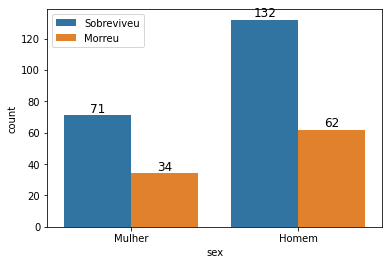

In [61]:
graf13 = sns.countplot(data=dados, x='sex', hue='DEATH_EVENT');
plt.legend(labels=['Sobreviveu', 'Morreu']);
plt.xticks(ticks=[0, 1], labels=['Mulher', 'Homem']);
rotulo(graf13)

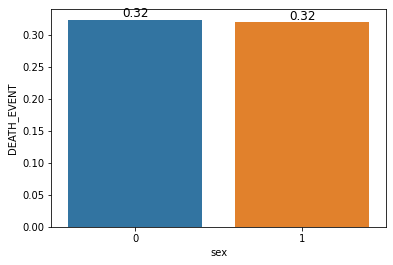

In [62]:
graf14 = sns.barplot(x="sex", y="DEATH_EVENT", data=dados, ci=False);
rotulo(graf14)

- A maioria dos pacientes do estudo é do sexo masculino.

- O gráfico mostra que não há diferença significativa nas porcentagens de óbitos entre os sexos. 

### 7) Smoking

In [63]:
dados.groupby("DEATH_EVENT")[["smoking"]].agg(['count','sum', 'mean'])

smoking              
              count sum      mean
DEATH_EVENT                      
0               203  66  0.325123
1                96  30  0.312500

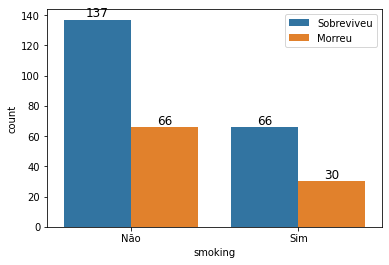

In [64]:
graf15 = sns.countplot(data=dados, x='smoking', hue='DEATH_EVENT');
plt.legend(labels=['Sobreviveu', 'Morreu']);
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim']);
rotulo(graf15)

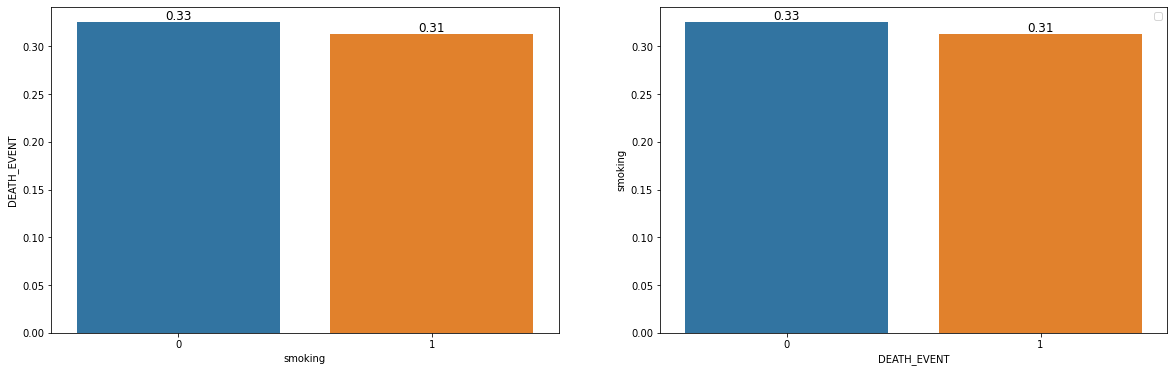

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graf16 = sns.barplot(x="smoking", y="DEATH_EVENT", data=dados, ci=False, ax=axes[0]);
plt.legend(labels=['Morreu', 'Sobreviveu']);
rotulo(graf16)
graf17 = sns.barplot(x="DEATH_EVENT", y="smoking", data=dados, ci=False, ax=axes[1]);
rotulo(graf17)

- Podemos constatar que a maioria (203) dos pacientes não é fumante. E parece não haver relação significativa com o tabagismo e a quantidade de mortes.

## Referências

- SALLES, Rodrigo. Correlação: direto ao ponto. *BrData*, 2018. Disponível em: <https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb>. Acesso em: 20 de novembro de 2021.


- EJECTION Fraction: What the Numbers Mean. *Penn Medicine*, 2014. Disponível em: <https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2014/october/ejection-fraction-what-the-numbers-mean>. Acesso em: 20 de novembro de 2021.